# EODAG features overview

- [EODAG ecosystem](#EODAG-ecosystem)
- [Installation](#Installation)
- [Configuration](#Configuration)
    - [Logging and init](#Logging-and-init)
- [Labextension usage](#Labextension-usage): see how to quicky generated EODAG snippets
- [Providers and product types](#Providers-and-product-types)
- [Search](#Search)
- [Serialize](#Serialize)
- [Crunch](#Crunch)
- [Download](#Download)
    - [Download quicklooks](#Download-quicklooks)
    - [Download products](#Download-products)
    - [Download an asset](#Download-an-asset)
- [Xarray data access](#Xarray-data-access) using [eodag-cube](https://github.com/CS-SI/eodag-cube)

## EODAG eocosystem

- `eodag-cube`: Data access functionalities have been split to a separate project to avoid conflicts with unneeded libraries when using only EODAG basic functionalities.

  EODAG-cube is available on [github](https://github.com/CS-SI/eodag-cube) and [pypi](https://pypi.org/project/eodag-cube/).
- `eodag-labextension` : Jupyterlab extension that brings a friendly UI to your notebook and helps you search and browse for EO products using EODAG.

  EODAG-labextension is available on [github](https://github.com/CS-SI/eodag-labextension) and [pypi](https://pypi.org/project/eodag-labextension).


## Installation

EODAG is really simple to install with `pip`:
```sh
pip install eodag
```
Or with `conda` from the conda-forge channel:
```
conda install -c conda-forge eodag
```

**_NOTE:_**  Since v3.0, EODAG comes with a minimal set of dependencies. If you want more features, please install using one of the following extras:
- `eodag[all]`, includes everything that would be needed to run EODAG and associated tutorials with all features
- `eodag[all-providers]`, includes dependencies required to have all providers available
- `eodag[csw]`, includes dependencies for plugins using CSW
- `eodag[ecmwf]`, includes dependencies for EcmwfApi (ecmwf provider)
- `eodag[usgs]`, includes dependencies for UsgsApi (usgs provider)
- `eodag[server]`, includes dependencies for server-mode

> For the workshop, we will use the latest pre-releases (`eodag[tutorials]` includes `eodag-cube` and other dependencies needed for the tutorials additionally to `eodag` basic install):
> ```sh
> pip install --pre "eodag[tutorials]" "eodag-labextension"
> ```

## Configuration

&rarr; We will configure `eodag` to be able to download using `cop_dataspace`. For that we need to fill our credentials. Check [Provider registration](https://eodag.readthedocs.io/en/latest/getting_started_guide/register.html) if you don't already have an account.

Credentials and other providers settings can be set:
- by editing the user configuration file `~/.config/eodag/eodag.yml` that was automatically created, and will contain:
```yaml
cop_dataspace:
    priority: # Lower value means lower priority (Default: 0)
    search:  # Search parameters configuration
    download:
        extract:  # whether to extract the downloaded products (true or false, Default: true).
        outputs_prefix: # where to store downloaded products.
        delete_archive: # whether to delete the downloaded archives (true or false, Default: true).
    auth:
        credentials:
            username: PLEASE_CHANGE_ME
            password: PLEASE_CHANGE_ME
```

- by setting environment variables following the pattern `EODAG__KEY1__KEY2__[...]__KEYN` (note the double underscore between the keys). For example, `EODAG__COP_DATASPACE__DOWNLOAD__OUTPUTS_PREFIX` can be used to change the download directory.

Check [documentation](https://eodag.readthedocs.io/en/latest/getting_started_guide/configure.html) for more information on how to configure EODAG.

### Logging and init

Logging is then activated with the [setup_logging()](https://eodag.readthedocs.io/en/latest/api_reference/utils.html#eodag.utils.logging.setup_logging) method. It's a useful way to see what `eodag` does under the hood, e.g. requesting the provider, adapting the response. It's also useful to detect when things go wrong, and, if relevant, create an [issue on GitHub](https://github.com/CS-SI/eodag/issues) with the log messages.

After setting the logging, the next object to import, and this is certainly one of the most important objects provided by `eodag`, is the [EODataAccessGateway](https://eodag.readthedocs.io/en/latest/api_reference/core.html#eodag.api.core.EODataAccessGateway) class. The creation of a single instance of this class is enough in a workflow, it is going to take care of configuring the providers, exposing the products configured off-the-shelf by `eodag`, and many more things.

&rarr; Try setting different levels of logging and instanciate `EODataAccessGateway` in a `dag` variable, to check the different displayed information

- - -
## Labextension usage

![extension logo](https://raw.githubusercontent.com/CS-SI/eodag-labextension/develop/notebooks/images/eodag_labext_icon.png)
Click on this icon in the left of JupyterLab interface to open EODAG-Labextension tab.

Please refer to [eodag-labextension user manual](https://github.com/CS-SI/eodag-labextension/blob/develop/notebooks/user_manual.ipynb).

&rarr; Configure map to be centered on Tartu, Estonia (Lat: 58.38, Lon: 26.73)

&rarr; Change providers priority in [EODAG configuration](#Configuration), reload environment through labextension button, and observe the providers order change in the dropdown list

&rarr; Search and preview results for last week `Sentinel-2 L2A` on `cop_dataspace` over Estonia having less than 50% over cloud coverage

&rarr; Same search as previous but on tile `35VME`, using parameter `tileIdentifier`

- - -
## Providers and product types

See [Python API User Guide / Providers and products](https://eodag.readthedocs.io/en/latest/notebooks/api_user_guide/2_providers_products_available.html) for documentation.

The method `EODataAccessGateway` [available_providers()](https://eodag.readthedocs.io/en/latest/api_reference/core.html#eodag.api.core.EODataAccessGateway.available_providers) returns a list of the pre-configured providers.

Note that if a provider is configured to need authentication for search, and has no credentials set, it will be pruned on EODAG initialization, and will not appear in available providers list.


&rarr; List all available providers from your previous `dag` (`EODataAccessGateway`) object, then the list of providers supporting `S1_SAR_GRD` product type

The method [list_product_types()](https://eodag.readthedocs.io/en/latest/api_reference/core.html#eodag.api.core.EODataAccessGateway.list_product_types) returns a dictionary that represents `eodag`'s internal product type catalog if used with `fetch_providers=False`. It will fetch providers for new product types and return an extended list if used with `fetch_providers=True` (default behavior).

&rarr; Check how many product types are available from internal catalog, then from extended catalog when fetching from providers. Check how many product types are available for provider `planetary_computer`.

- - -
## Search

See [Python API User Guide / Search](https://eodag.readthedocs.io/en/latest/notebooks/api_user_guide/4_search.html) for documentation.

The [EODataAccessGateway](https://eodag.readthedocs.io/en/latest/api_reference/core.html#eodag.api.core.EODataAccessGateway) class provides three search methods which have a similar signature but behave in different ways:

- [search()](https://eodag.readthedocs.io/en/latest/api_reference/core.html#eodag.api.core.EODataAccessGateway.search) returns a [SearchResult](https://eodag.readthedocs.io/en/latest/api_reference/searchresult.html#eodag.api.search_result.SearchResult) that stores the products obtained from a given **page** (default: `page=1`) and a given maximum **number of items per page** (default: `items_per_page=20`). The attribute [SearchResult.number_matched](https://eodag.readthedocs.io/en/latest/api_reference/searchresult.html#eodag.api.search_result.SearchResult) optionally stores the **estimated** total number of products matching the search criteria.
- [search_all()](https://eodag.readthedocs.io/en/latest/api_reference/core.html#eodag.api.core.EODataAccessGateway.search_all) returns a [SearchResult](https://eodag.readthedocs.io/en/latest/api_reference/searchresult.html#eodag.api.search_result.SearchResult) that contains **all** the products matching the search criteria. It takes the pain away from thinking about pagination.
- [search_iter_page()](https://eodag.readthedocs.io/en/latest/api_reference/core.html#eodag.api.core.EODataAccessGateway.search_iter_page) is a generator that returns a [SearchResult](https://eodag.readthedocs.io/en/latest/api_reference/searchresult.html#eodag.api.search_result.SearchResult) page per page.

&rarr; search (1st page), **without** count, for `S2_MSI_L2A` products on `creodias` provider during May 2024 over a given bbox

&rarr; search (2nd page), **with** count, for `S2_MSI_L2A` products on `creodias` provider during May 2024 over a given bbox

&rarr; search (all) for `S2_MSI_L2A` products on `creodias` provider during May 2024 over a given bbox

&rarr; search (1st page) for `S2_MSI_L2A` products on `creodias` provider during May 2024 over Estonia (using `locations` and `EST` country code)

&rarr; plot search result geometries on a map using `folium`

- - -
## Serialize

See [Python API User Guide / Serialize/Deserialize](https://eodag.readthedocs.io/en/latest/notebooks/api_user_guide/5_serialize_deserialize.html) for documentation.

&rarr; Serialize/Deserialize previous results

- - -
## Crunch

See [Python API User Guide / Crunch](https://eodag.readthedocs.io/en/latest/notebooks/api_user_guide/6_crunch.html) for documentation.

&rarr; Use [SearchResult.filter_property()](https://eodag.readthedocs.io/en/latest/api_reference/searchresult.html#eodag.api.search_result.SearchResult.filter_property) to filter previous results and only keep products having `relativeOrbitNumber` greater than 80

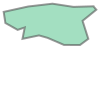

In [80]:
# Get Estonia geometry
from eodag.utils import get_geometry_from_various

est_geom = get_geometry_from_various(dag.locations_config, locations={"country": "EST"})
est_geom

&rarr; Filter `search_all` results using [SearchResult.filter_latest_intersect()](https://eodag.readthedocs.io/en/latest/api_reference/searchresult.html#eodag.api.search_result.SearchResult.filter_latest_intersect) to only keep latest products that intersect Estonia geometry and plot them on a map

&rarr; Filter previous crunched results using [SearchResult.filter_overlap()](https://eodag.readthedocs.io/en/latest/api_reference/searchresult.html#eodag.api.search_result.SearchResult.filter_overlap) to only products that overlap at least of 90% Estonia geometry and plot them on a map

- - -
## Download

See [Python API User Guide / Download](https://eodag.readthedocs.io/en/latest/notebooks/api_user_guide/7_download.html) for documentation.

*Make sure that you configured EODAG with `cop_dataspace` credentials.*

&rarr; perform a new search on `cop_dataspace`

### Download quicklooks

&rarr; Download and display quicklooks using [EOProduct.get_quicklook()](https://eodag.readthedocs.io/en/latest/api_reference/eoproduct.html#eodag.api.product._product.EOProduct.get_quicklook) and `matplotlib.image` (see [Download quicklooks documentation](https://eodag.readthedocs.io/en/latest/notebooks/api_user_guide/7_download.html#Download-quicklooks))

### Download products

&rarr; download a single product, using [EODataAccessGateway.download()](https://eodag.readthedocs.io/en/latest/api_reference/core.html#eodag.api.core.EODataAccessGateway.download) or [EOProduct.download()](https://eodag.readthedocs.io/en/latest/api_reference/eoproduct.html#eodag.api.product._product.EOProduct.download)

&rarr; try downloading it again at the same place and see that EODAG will not download it again: it will be skipped as the successful download was recorded in the `.downloaded` directory created in the download directory

&rarr; check that `EOProduct.location` was changed to downloaded directory after its download

&rarr; download several products, using [EODataAccessGateway.download_all()](https://eodag.readthedocs.io/en/latest/api_reference/core.html#eodag.api.core.EODataAccessGateway.download_all). Slice search result before downloading it, in order to avoid waiting for ages. See [documentation](https://eodag.readthedocs.io/en/latest/notebooks/api_user_guide/7_download.html#Download-multiple-products-at-once)

### Download an asset

Searching on some providers (mainly STAC providers) returns products having an `assets` attribute listing single files that can be individually donwloaded. See [documentation](https://eodag.readthedocs.io/en/latest/notebooks/api_user_guide/7_download.html#Download-assets).

&rarr; search for `S2_MSI_L2A_COG` product type and check first product `assests` attribute (no authentication needed for it, you will not need another account)

&rarr; download an asset by executing
```py
search_results[0].assets["some-key"].download()
```

## Xarray data access

At some point `eodag` had some capabilities to directly post-process a product, i.e. to access its data. These capabilities, which relied on [rasterio](https://rasterio.readthedocs.io/en/latest/), have been ported to the Python package [eodag-cube](https://github.com/CS-SI/eodag-cube) to avoid the heavy dependencies associated with  *GDAL* in particular. Installing this package is enough to benefit from its capabilities, it is going to extend [EOProduct](../../api_reference/eoproduct.rst#eodag.api.product._product.EOProduct) with a `get_data()` method which returns a product's image band as a `xarray.DataArray`.

The capabilities of [eodag-cube](https://github.com/CS-SI/eodag-cube) are used hereafter to compute the NDVI of the downloaded product over a sub-extent of the original product (this is actually Tartu, Estonia).

&rarr; Search for `S2_MSI_L2A_COG` (bands are directly available as individual assets) with less than 10% of cloud cover and using the following geometry (bbox over Tartu):
```py
geometry = "POLYGON ((26.663818 58.323866, 26.663818 58.390869, 26.802521 58.390869, 26.802521 58.323866, 26.663818 58.323866))"
```

&rarr; Follow [documentation example](https://eodag.readthedocs.io/en/latest/notebooks/api_user_guide/8_post_process.html#Data-access-with-eodag-cube) to compute and plot a NDVI using similar `common_params`, with Tartu bbox as `extent`, `VIR band` as `r"red$"` and `NIR band` as `r"nir$"` (regex used in order to prevent matching other bands `nir08`, `rededge1`,...)